In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

# see how to find relative path in the class notes sent around

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


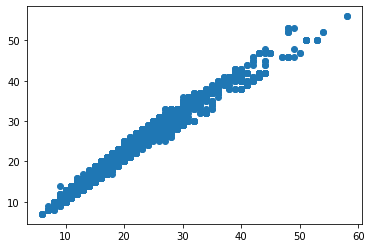

In [5]:
plt.scatter(vehicles['City MPG'], vehicles['Combined MPG'])

# we can see the strong correlation, but let's find out for sure:

In [6]:
vehicles['City MPG'].corr(vehicles['Combined MPG'])

0.9854567808355141

In [7]:
vehicles['City MPG'].corr(vehicles['City MPG'])

# Obviously if you find the corr between a variable with itselfm it will be 1. 

1.0

In [8]:
# Correlation Matrix!
# correlation matrix with all numerical variables.
# How to read: the matrix is symmetric at the diagonal (similar to a multiplication table!)

vehicles.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


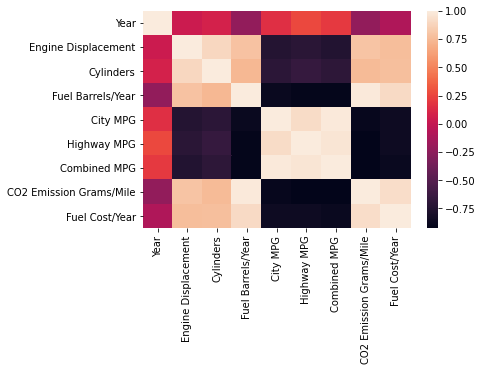

In [9]:
# let's use a heat map to display this correlation graphically

sns.heatmap(vehicles.corr())

# but note that the colors used here are not ideal because its a bit counter-intuitive. 
# Also note that the values shown in the legend go from -0.75 to 1 because it is related to the values in our variables
# but it would be helpful to have a range from -1 to 1.

In [11]:
help(sns.heatmap)

# to see how to change range and colors

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

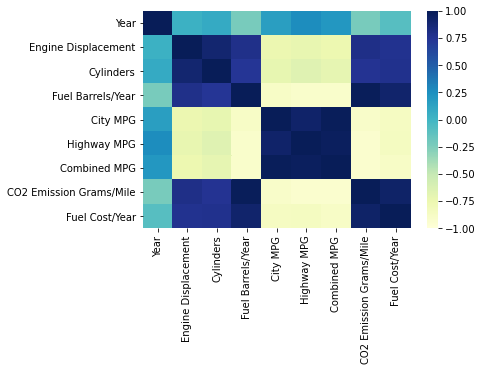

In [13]:
sns.heatmap(vehicles.corr(), vmin = -1, vmax = 1, cmap="YlGnBu")
# make more readable with <annot> option

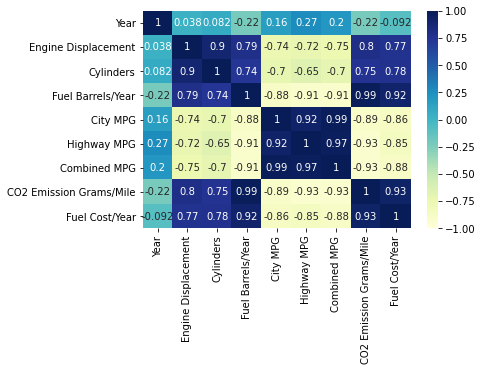

In [14]:
sns.heatmap(vehicles.corr(), vmin = -1, vmax = 1, cmap="YlGnBu", annot = True)

In [15]:
# note: the default corr. coefficient would be Pearson's. Let's look at Spearman's instead
vehicles.corr(method = 'spearman')

# Spearman's uses a sorting system (e.g. for each value, sorting them and comparing the two variables based on every "rank") to show correlation, in which case outliers become less significant and disruptive.

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.051370,0.068727,-0.214857,0.157137,0.266934,0.205080,-0.215108,-0.091437
Engine Displacement,0.051370,1.000000,0.927979,0.827152,-0.848167,-0.754080,-0.824065,0.831333,0.794755
Cylinders,0.068727,0.927979,1.000000,0.784595,-0.818672,-0.698356,-0.783362,0.788777,0.790481
Fuel Barrels/Year,-0.214857,0.827152,0.784595,1.000000,-0.974144,-0.963335,-0.990364,0.995539,0.919069
City MPG,0.157137,-0.848167,-0.818672,-0.974144,1.000000,0.930120,0.985062,-0.979787,-0.928713
Highway MPG,0.266934,-0.754080,-0.698356,-0.963335,0.930120,1.000000,0.970769,-0.968693,-0.876067
Combined MPG,0.205080,-0.824065,-0.783362,-0.990364,0.985062,0.970769,1.000000,-0.995258,-0.926078
CO2 Emission Grams/Mile,-0.215108,0.831333,0.788777,0.995539,-0.979787,-0.968693,-0.995258,1.000000,0.922723
Fuel Cost/Year,-0.091437,0.794755,0.790481,0.919069,-0.928713,-0.876067,-0.926078,0.922723,1.000000


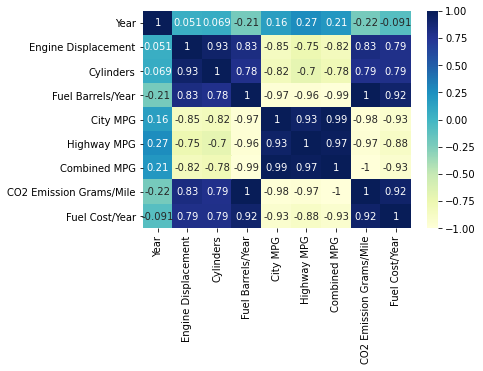

In [16]:
sns.heatmap(vehicles.corr(method = 'spearman'), vmin = -1, vmax = 1, cmap="YlGnBu", annot = True)

# note how it differs from the table above and how it is less affected by outliers. 

### Pivot Tables

In [17]:
help(pd.pivot_table)
# Always need to give data and index (which is a column we want to group by)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same lengt

In [20]:
vehicles.pivot_table(index = 'Vehicle Class')

# for each vehicle class, we will see a summary of all the other variables (AVG is shown, default function used is numpy.mean!!!)
# so we will see the mean of all other variables separated by 'Vehicle Class'
# see how the aggfunction can be changed below:

,CO2 Emission Grams/Mile,City MPG,Combined MPG,Cylinders,Engine Displacement,Fuel Barrels/Year,Fuel Cost/Year,Highway MPG,Year
Vehicle Class,,,,,,,,,
Compact Cars,396.758088,20.570685,23.373385,4.837223,2.469296,14.705935,1612.295082,28.210222,2001.097589
Large Cars,484.391278,16.130310,18.936854,7.128588,4.152354,17.893457,1992.680827,23.989667,2004.792193
Midsize Cars,432.861095,18.950775,21.670441,5.665026,3.148929,16.059481,1768.028550,26.569776,2002.438100
Midsize Station Wagons,432.128533,18.360577,21.024038,5.173077,2.706490,16.029417,1826.682692,25.627404,2004.108173
Midsize-Large Station Wagons,452.981561,17.590837,19.924171,5.113744,2.847867,16.807043,1722.590837,23.984202,1989.941548
Minicompact Cars,443.861984,18.380363,21.028053,5.764026,3.123597,16.467255,1972.112211,25.611386,2004.628713
Minivan - 2WD,469.287896,16.679758,19.117825,5.800604,3.416012,17.370910,1758.459215,23.410876,2006.380665
Minivan - 4WD,504.595699,15.425532,17.638298,6.000000,3.570213,18.723079,1887.234043,21.531915,2005.063830
Small Pickup Trucks,450.039261,18.416031,20.257634,4.648855,2.686641,16.704702,1687.690840,23.255725,1988.938931


In [22]:
vehicles.pivot_table(index = 'Drivetrain', aggfunc = np.median)

# pivot tables appear to be very similar to a groupby function in python

,CO2 Emission Grams/Mile,City MPG,Combined MPG,Cylinders,Engine Displacement,Fuel Barrels/Year,Fuel Cost/Year,Highway MPG,Year
Drivetrain,,,,,,,,,
2-Wheel Drive,555.437500,15.0,16,6.0,4.1,20.600625,2100,19,1984
"2-Wheel Drive, Front",315.000000,25.0,28,4.0,2.0,11.771786,1450,33,2017
4-Wheel Drive,475.000000,17.0,19,6.0,3.8,17.347895,1950,22,2013
4-Wheel or All-Wheel Drive,555.437500,15.0,16,6.0,3.6,20.600625,2150,19,1999
All-Wheel Drive,429.000000,18.0,21,6.0,3.0,15.695714,1750,25,2014
Front-Wheel Drive,386.391304,20.0,23,4.0,2.2,14.330870,1450,28,2000
Part-time 4-Wheel Drive,545.500000,14.5,16,7.0,4.3,20.600625,2100,19,2014
Rear-Wheel Drive,517.000000,15.0,18,6.0,4.0,19.388824,2100,21,2000


In [25]:
# we can also pass it columns!
# we will have our variables on the top

vehicles.pivot_table(index = 'Drivetrain', columns = 'Year')

CO2 Emission Grams/Mile                          \
Year                                          1984        1985        1986   
Drivetrain                                                                   
2-Wheel Drive                           566.518893         NaN         NaN   
2-Wheel Drive, Front                           NaN         NaN         NaN   
4-Wheel Drive                                  NaN         NaN  807.909091   
4-Wheel or All-Wheel Drive              578.302035  576.157413  575.008731   
All-Wheel Drive                                NaN         NaN         NaN   
Front-Wheel Drive                              NaN  394.198531  389.198577   
Part-time 4-Wheel Drive                        NaN         NaN         NaN   
Rear-Wheel Drive                        488.122024  538.280443  537.159212   

                                                                            \
Year                              1987        1988        1989        1990   
Drivetrain                                                                   
2-Wheel Drive                      NaN         NaN         NaN         NaN   
2-Wheel Drive, Front               NaN         NaN         NaN         NaN   
4-Wheel Drive                      NaN         NaN         NaN         NaN   
4-Wheel or All-Wheel Drive  574.211642  582.023221  576.875806  570.889716   
All-Wheel Drive                    NaN         NaN         NaN         NaN   
Front-Wheel Drive           393.273745  389.676643  392.780422  399.249171   
Part-time 4-Wheel Drive            NaN         NaN         NaN         NaN   
Rear-Wheel Drive            550.843238  551.737550  560.497511  561.541399   

                                                                ...  \
Year                              1991        1992        1993  ...   
Drivetrain                                                      ...   
2-Wheel Drive                      NaN         NaN         NaN  ...   
2-Wheel Drive, Front               NaN         NaN         NaN  ...   
4-Wheel Drive                      NaN         NaN         NaN  ...   
4-Wheel or All-Wheel Drive  573.032390  570.072438  564.775194  ...   
All-Wheel Drive                    NaN         NaN         NaN  ...   
Front-Wheel Drive           401.230299  406.112597  404.748348  ...   
Part-time 4-Wheel Drive            NaN         NaN         NaN  ...   
Rear-Wheel Drive            565.973783  567.554563  560.896114  ...   

                           Highway MPG                                   \
Year                              2008       2009       2010       2011   
Drivetrain                                                                
2-Wheel Drive                      NaN        NaN        NaN        NaN   
2-Wheel Drive, Front               NaN        NaN        NaN        NaN   
4-Wheel Drive                      NaN        NaN  21.263158  21.231343   
4-Wheel or All-Wheel Drive   21.059850  21.598504  25.000000        NaN   
All-Wheel Drive                    NaN  25.571429  23.208531  23.991525   
Front-Wheel Drive            27.911528  28.695538  29.647520  30.469613   
Part-time 4-Wheel Drive            NaN        NaN  19.090909  18.846154   
Rear-Wheel Drive             21.582927  21.956853  22.737143  22.656992   

                                                                        \
Year                             2012       2013       2014       2015   
Drivetrain                                                               
2-Wheel Drive                     NaN        NaN        NaN        NaN   
2-Wheel Drive, Front              NaN        NaN        NaN        NaN   
4-Wheel Drive               22.328244  22.791304  23.590909  23.640000   
4-Wheel or All-Wheel Drive        NaN        NaN        NaN        NaN   
All-Wheel Drive             24.276498  25.284585  25.917266  27.010101   
Front-Wheel Drive           31.540470  32.507212  32.997630  33.313397   
Part-time 4-Wheel Drive     18.9565

In [26]:
# fill the NaN values:

vehicles.pivot_table(index = 'Drivetrain', columns = 'Year', fill_value = 0)

CO2 Emission Grams/Mile                          \
Year                                          1984        1985        1986   
Drivetrain                                                                   
2-Wheel Drive                           566.518893    0.000000    0.000000   
2-Wheel Drive, Front                      0.000000    0.000000    0.000000   
4-Wheel Drive                             0.000000    0.000000  807.909091   
4-Wheel or All-Wheel Drive              578.302035  576.157413  575.008731   
All-Wheel Drive                           0.000000    0.000000    0.000000   
Front-Wheel Drive                         0.000000  394.198531  389.198577   
Part-time 4-Wheel Drive                   0.000000    0.000000    0.000000   
Rear-Wheel Drive                        488.122024  538.280443  537.159212   

                                                                            \
Year                              1987        1988        1989        1990   
Drivetrain                                                                   
2-Wheel Drive                 0.000000    0.000000    0.000000    0.000000   
2-Wheel Drive, Front          0.000000    0.000000    0.000000    0.000000   
4-Wheel Drive                 0.000000    0.000000    0.000000    0.000000   
4-Wheel or All-Wheel Drive  574.211642  582.023221  576.875806  570.889716   
All-Wheel Drive               0.000000    0.000000    0.000000    0.000000   
Front-Wheel Drive           393.273745  389.676643  392.780422  399.249171   
Part-time 4-Wheel Drive       0.000000    0.000000    0.000000    0.000000   
Rear-Wheel Drive            550.843238  551.737550  560.497511  561.541399   

                                                                ...  \
Year                              1991        1992        1993  ...   
Drivetrain                                                      ...   
2-Wheel Drive                 0.000000    0.000000    0.000000  ...   
2-Wheel Drive, Front          0.000000    0.000000    0.000000  ...   
4-Wheel Drive                 0.000000    0.000000    0.000000  ...   
4-Wheel or All-Wheel Drive  573.032390  570.072438  564.775194  ...   
All-Wheel Drive               0.000000    0.000000    0.000000  ...   
Front-Wheel Drive           401.230299  406.112597  404.748348  ...   
Part-time 4-Wheel Drive       0.000000    0.000000    0.000000  ...   
Rear-Wheel Drive            565.973783  567.554563  560.896114  ...   

                           Highway MPG                                   \
Year                              2008       2009       2010       2011   
Drivetrain                                                                
2-Wheel Drive                 0.000000   0.000000   0.000000   0.000000   
2-Wheel Drive, Front          0.000000   0.000000   0.000000   0.000000   
4-Wheel Drive                 0.000000   0.000000  21.263158  21.231343   
4-Wheel or All-Wheel Drive   21.059850  21.598504  25.000000   0.000000   
All-Wheel Drive               0.000000  25.571429  23.208531  23.991525   
Front-Wheel Drive            27.911528  28.695538  29.647520  30.469613   
Part-time 4-Wheel Drive       0.000000   0.000000  19.090909  18.846154   
Rear-Wheel Drive             21.582927  21.956853  22.737143  22.656992   

                                                                        \
Year                             2012       2013       2014       2015   
Drivetrain                                                               
2-Wheel Drive                0.000000   0.000000   0.000000   0.000000   
2-Wheel Drive, Front         0.000000   0.000000   0.000000   0.000000   
4-Wheel Drive               22.328244  22.791304  23.590909  23.640000   
4-Wheel or All-Wheel Drive   0.000000   0.000000   0.000000   0.000000   
All-Wheel Drive             24.276498  25.284585  25.917266  27.010101   
Front-Wheel Drive           31.540470  32.507212  32.997630  33.313397   
Part-time 4-Wheel Drive     18.9565

In [28]:
# make it easier to read
# only values for 'City MPG'
# this shows the values of only City MPG broken down by Drivetrain!

vehicles.pivot_table(index = 'Drivetrain', values = 'City MPG', fill_value = 0)

,City MPG
Drivetrain,
2-Wheel Drive,15.624113
"2-Wheel Drive, Front",25.000000
4-Wheel Drive,16.913989
4-Wheel or All-Wheel Drive,15.035061
All-Wheel Drive,18.312898
Front-Wheel Drive,21.174563
Part-time 4-Wheel Drive,14.620253
Rear-Wheel Drive,15.422049


In [29]:
# you can also pass a list in the index to show multiple variables
# pivot tables are super helpful for multivariate data analyses!

vehicles.pivot_table(index = ['Drivetrain', 'Vehicle Class'], values = 'City MPG', fill_value = 0)

City MPG
Drivetrain       Vehicle Class                         
2-Wheel Drive    Large Cars                   15.333333
                 Minivan - 2WD                17.000000
                 Small Pickup Trucks 2WD      20.193878
                 Special Purpose Vehicle 2WD  16.800000
                 Special Purpose Vehicles     13.125000
...                                                 ...
Rear-Wheel Drive Two Seaters                  16.196862
                 Vans                         13.623077
                 Vans Passenger               13.000000
                 Vans, Cargo Type             12.687273
                 Vans, Passenger Type         12.233010

[118 rows x 1 columns]